<a href="https://colab.research.google.com/github/julianovale/BB_Evolution/blob/main/0026_AluraBB_SeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series

In [1]:
import os
if not os.path.isfile('/content/material+curso+-+Time+Series.zip'):
  ! wget https://s3.amazonaws.com/caelum-online-public/1119-time-series-pandas/material/material+curso+-+Time+Series.zip
  ! unzip material+curso+-+Time+Series.zip

! ls

--2021-07-20 18:19:56--  https://s3.amazonaws.com/caelum-online-public/1119-time-series-pandas/material/material+curso+-+Time+Series.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.36.38
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.36.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6196 (6.1K) [application/zip]
Saving to: ‘material+curso+-+Time+Series.zip’

material+curso+-+Ti 100%[===================>]   6.05K  --.-KB/s    in 0s      

2021-07-20 18:19:56 (79.6 MB/s) - ‘material+curso+-+Time+Series.zip’ saved [6196/6196]

Archive:  material+curso+-+Time+Series.zip
   creating: material curso - Time Series/
  inflating: material curso - Time Series/dias_final_de_semana.csv  
   creating: __MACOSX/
   creating: __MACOSX/material curso - Time Series/
  inflating: __MACOSX/material curso - Time Series/._dias_final_de_semana.csv  
  inflating: material curso - Time Series/vendas_por_dia.csv  
  inflating: __MACOSX/material curso - Time S

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Alucar - Analisando as vendas

In [3]:
arquivo = '/content/material curso - Time Series/alucar.csv'

alucar = pd.read_csv(arquivo)
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
alucar.shape

(24, 2)

In [5]:
alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [6]:
alucar.isna().sum().sum()

0

In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
# Convertendo o mês para date-time

alucar['mes'] = pd.to_datetime(alucar['mes'])

In [9]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [10]:
print(sns.__version__)

0.11.1


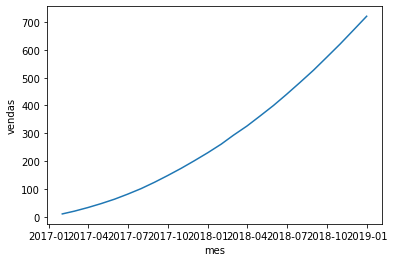

In [11]:
sns.lineplot(data=alucar, x='mes', y='vendas');

## Urban Institute Data Visualization Style Guide

https://urbaninstitute.github.io/graphics-styleguide/

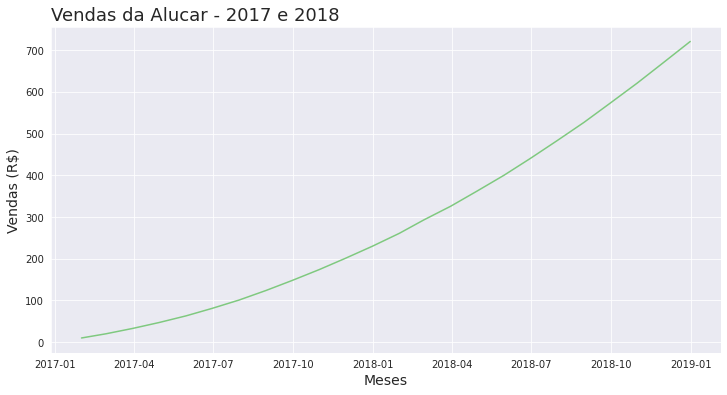

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(data=alucar, x='mes', y='vendas')
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas da Alucar - 2017 e 2018', loc = 'left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14);

## Decomposição e Autocorrelação

In [13]:
alucar['incremento'] = alucar['vendas'].diff()
alucar

,mes,vendas,incremento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0
7,2017-08-31,124,23.0
8,2017-09-30,148,24.0
9,2017-10-31,174,26.0


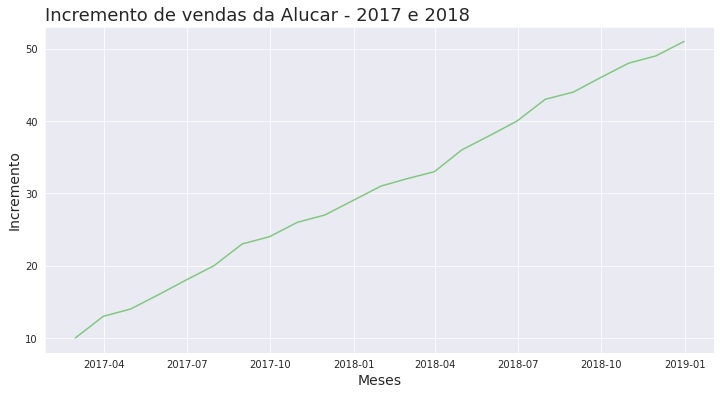

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(data=alucar, x='mes', y='incremento')
ax.figure.set_size_inches(12,6)
ax.set_title('Incremento de vendas da Alucar - 2017 e 2018', loc = 'left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Incremento', fontsize=14);

In [15]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(data=dataset, x=x, y=y)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc = 'left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14);

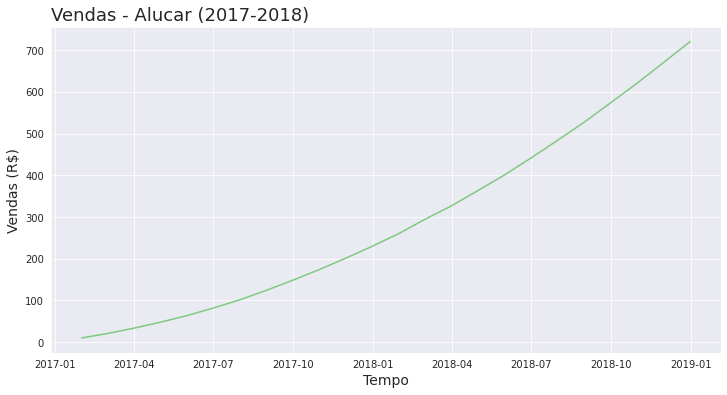

In [16]:
plotar("Vendas - Alucar (2017-2018)",
       "Tempo",
       "Vendas (R$)",
       "mes",
       "vendas",
       alucar)

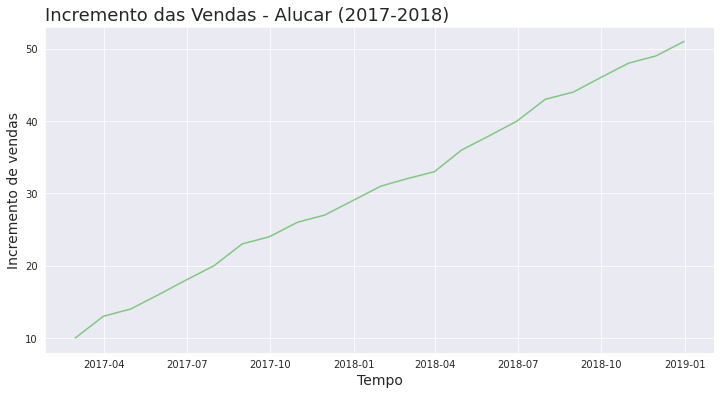

In [17]:
plotar("Incremento das Vendas - Alucar (2017-2018)",
       "Tempo",
       "Incremento de vendas",
       "mes",
       "incremento",
       alucar)

In [18]:
alucar['aceleracao'] = alucar['incremento'].diff()
alucar

,mes,vendas,incremento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0
7,2017-08-31,124,23.0,3.0
8,2017-09-30,148,24.0,1.0
9,2017-10-31,174,26.0,2.0


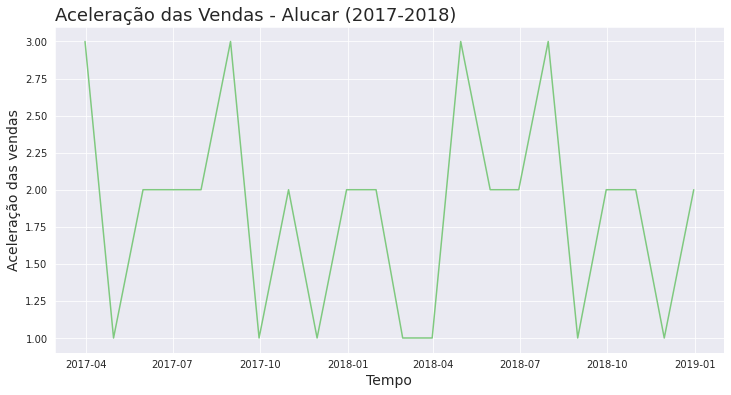

In [19]:
plotar("Aceleração das Vendas - Alucar (2017-2018)",
       "Tempo",
       "Aceleração das vendas",
       "mes",
       "aceleracao",
       alucar)

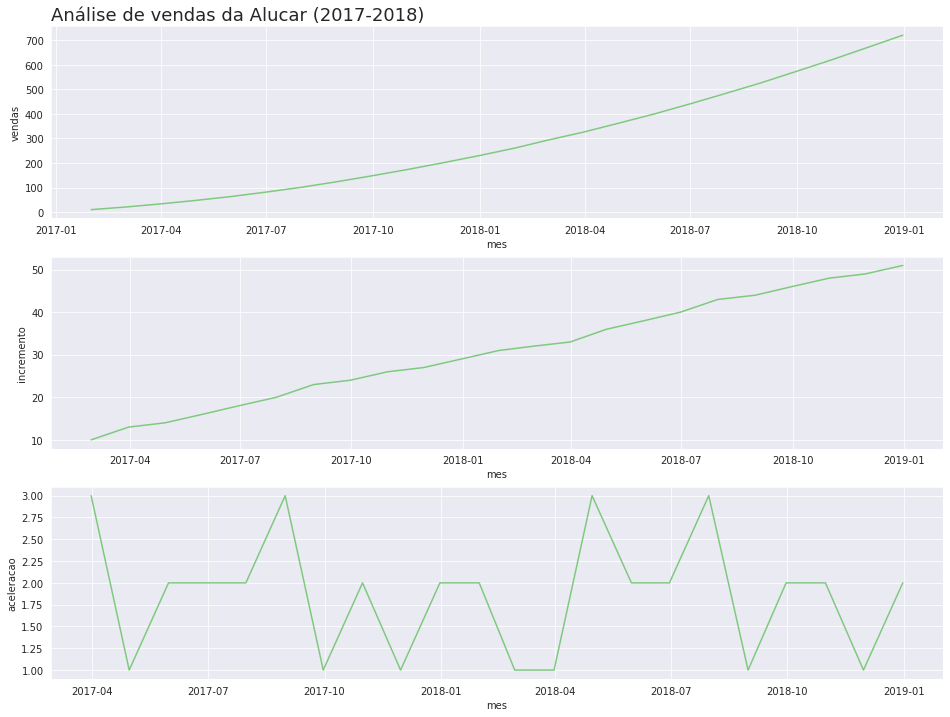

In [20]:
plt.figure(figsize=(16,12))
ax=plt.subplot(3,1,1)
ax.set_title("Análise de vendas da Alucar (2017-2018)", fontsize=18, loc='left')
sns.lineplot(data=alucar, x='mes', y='vendas')
plt.subplot(3,1,2)
sns.lineplot(data=alucar, x='mes', y='incremento')
plt.subplot(3,1,3)
sns.lineplot(data=alucar, x='mes', y='aceleracao')
ax=ax

In [21]:
def plot_comparacao(x, y1, y2, y3, titulo, dataset):
  plt.figure(figsize=(16,12))
  ax=plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(data=dataset, x=x, y=y1)
  plt.subplot(3,1,2)
  sns.lineplot(data=dataset, x=x, y=y2)
  plt.subplot(3,1,3)
  sns.lineplot(data=dataset, x=x, y=y3)
  ax=ax

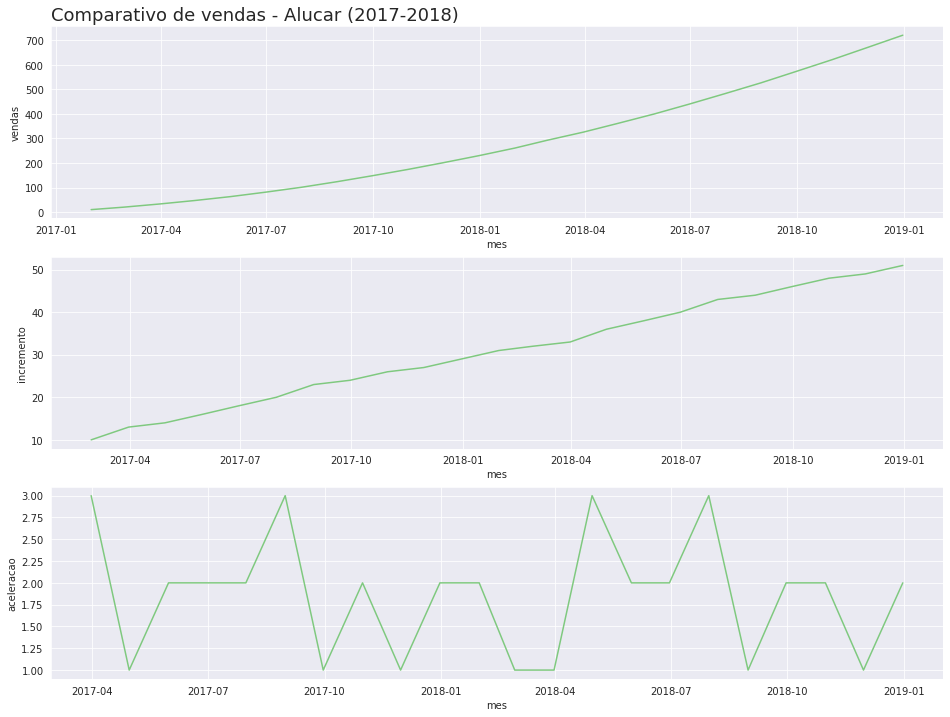

In [22]:
plot_comparacao('mes', 'vendas', 'incremento', 'aceleracao', 'Comparativo de vendas - Alucar (2017-2018)', alucar)

# Autocorrelação

In [23]:
from pandas.plotting import autocorrelation_plot

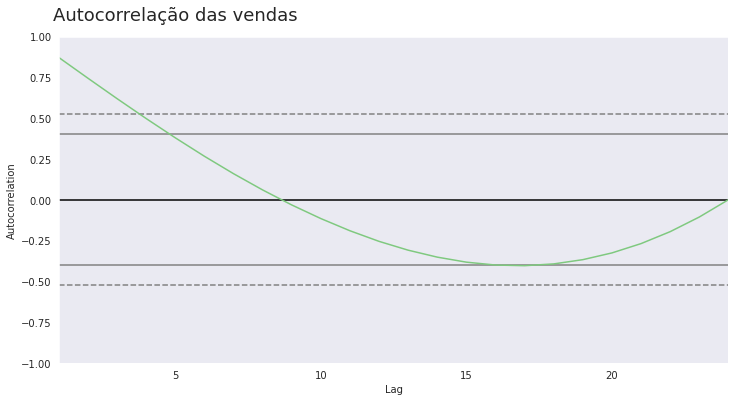

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas']);

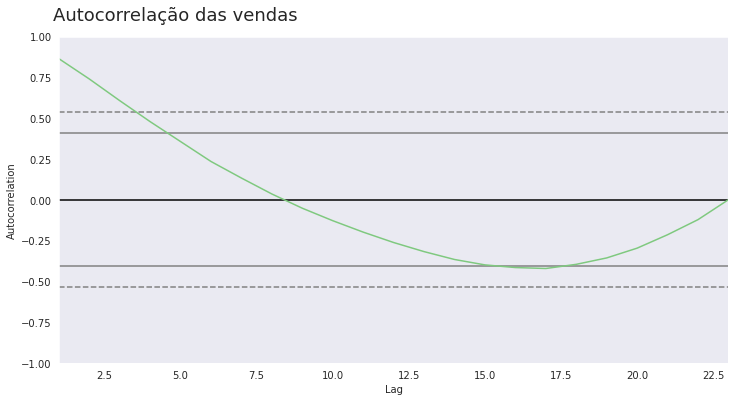

In [25]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['incremento'][1:]);

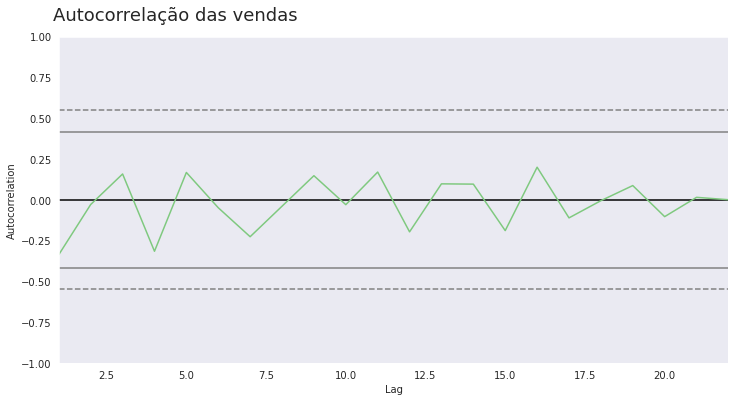

In [26]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:]);

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


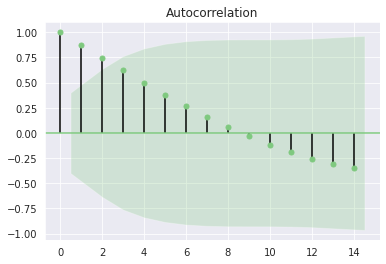

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(alucar['vendas']);

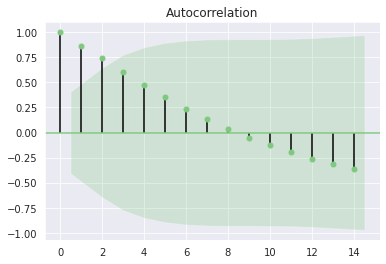

In [28]:
plot_acf(alucar['incremento'][1:]);

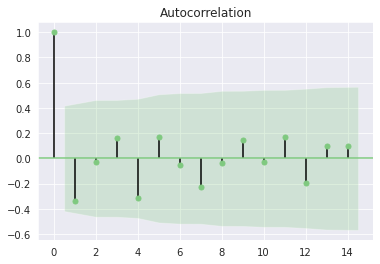

In [29]:
plot_acf(alucar['aceleracao'][2:]);

# Alucar - Analisando assinantes da Newsletter

In [30]:
assinantes = pd.read_csv('/content/material curso - Time Series/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [31]:
assinantes.shape

(24, 2)

In [32]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [33]:
assinantes.isna().sum()

mes           0
assinantes    0
dtype: int64

In [34]:
assinantes.isna().sum().sum()

0

In [35]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [36]:
assinantes['incremento'] = assinantes['assinantes'].diff()
assinantes

,mes,assinantes,incremento
0,2017-01-31,0,NaN
1,2017-02-28,10,10.0
2,2017-03-31,21,11.0
3,2017-04-30,34,13.0
4,2017-05-31,49,15.0
5,2017-06-30,66,17.0
6,2017-07-31,85,19.0
7,2017-08-31,107,22.0
8,2017-09-30,132,25.0
9,2017-10-31,160,28.0


In [37]:
assinantes['aceleracao'] = assinantes['incremento'].diff()
assinantes

,mes,assinantes,incremento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


In [38]:
assinantes.columns.ravel()

array(['mes', 'assinantes', 'incremento', 'aceleracao'], dtype=object)

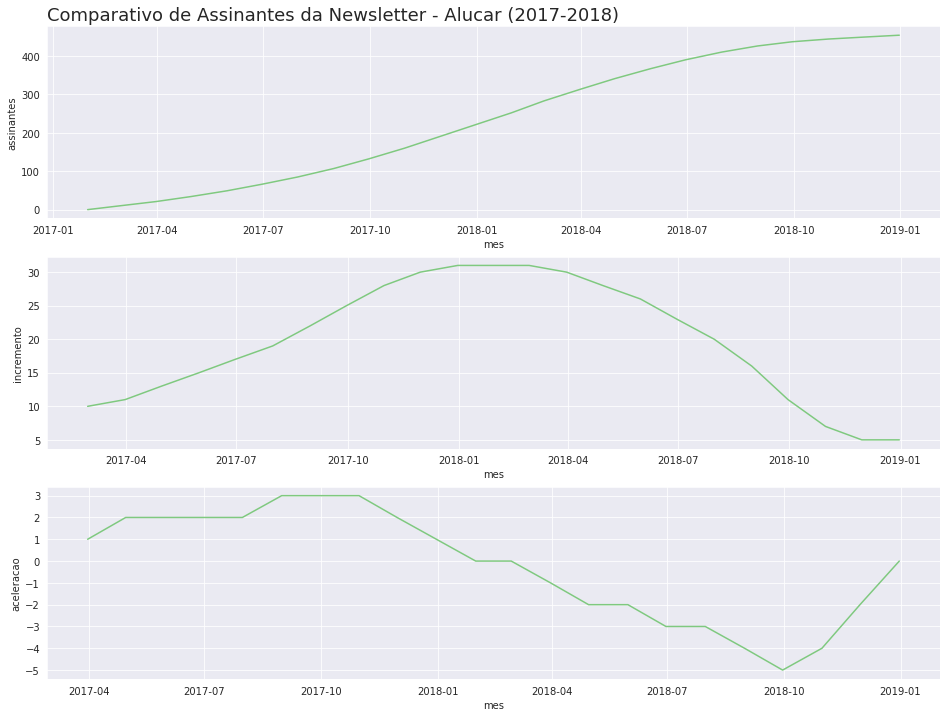

In [39]:
plot_comparacao('mes', 'assinantes', 'incremento', 'aceleracao', 'Comparativo de Assinantes da Newsletter - Alucar (2017-2018)', assinantes)

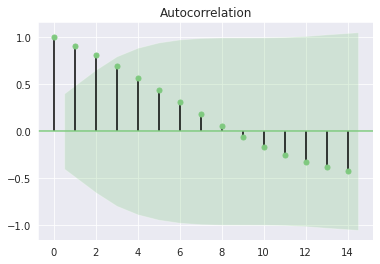

In [40]:
plot_acf(assinantes['assinantes']);

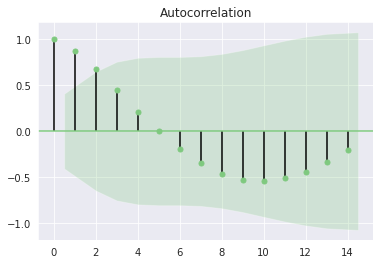

In [41]:
plot_acf(assinantes['incremento'][1:]);

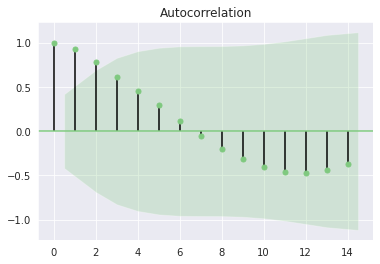

In [42]:
plot_acf(assinantes['aceleracao'][2:]);

# Chocolura - analisando as vendas - Sazonalidade

In [43]:
chocolura = pd.read_csv('/content/material curso - Time Series/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [44]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [45]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [46]:
chocolura.isna().sum().sum()

0

In [47]:
chocolura.shape

(24, 2)

In [48]:
chocolura['incremento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['incremento'].diff()
chocolura.head()

,mes,vendas,incremento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


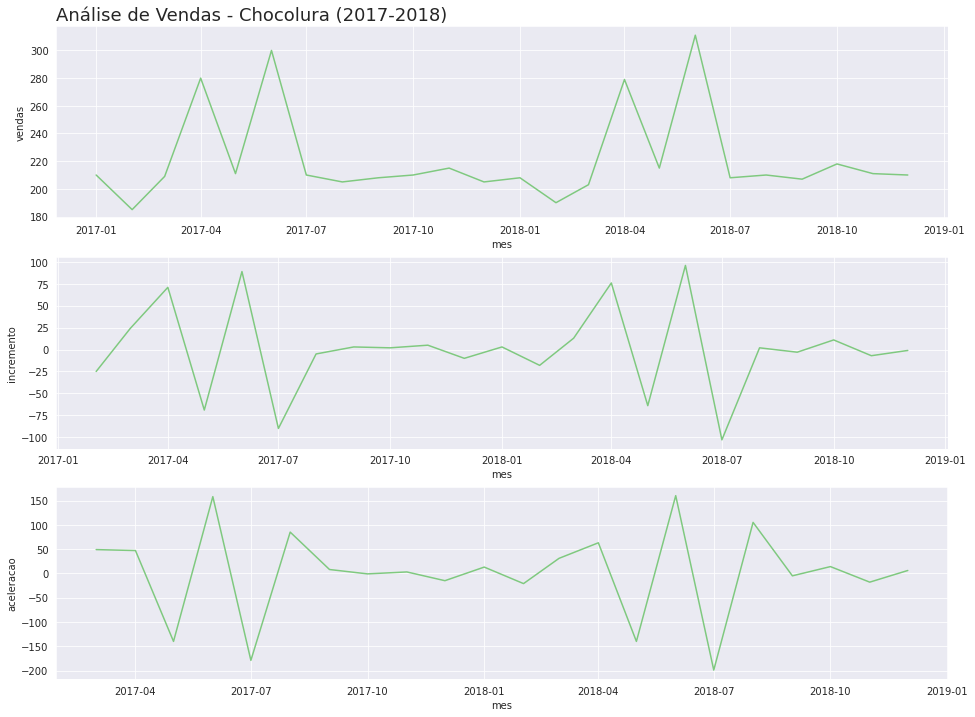

In [49]:
plot_comparacao('mes', 'vendas', 'incremento', 'aceleracao', 'Análise de Vendas - Chocolura (2017-2018)', chocolura)

In [50]:
# sazonalidade

## Chocolura - Vendas diárias outubro e novembro

In [51]:
vendas_por_dia = pd.read_csv('/content/material curso - Time Series/vendas_por_dia.csv')

In [52]:
vendas_por_dia

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
...,...,...
56,2018-11-26,54
57,2018-11-27,60
58,2018-11-28,49
59,2018-11-29,50


In [53]:
vendas_por_dia.isna().sum().sum()

0

In [54]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [55]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [56]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [57]:
vendas_por_dia['incremento'] = vendas_por_dia['vendas'].diff()

In [58]:
vendas_por_dia['aceleracao'] = vendas_por_dia['incremento'].diff()

In [59]:
vendas_por_dia.head(15)

,dia,vendas,incremento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0
5,2018-10-06,18,-33.0,-34.0
6,2018-10-07,20,2.0,35.0
7,2018-10-08,50,30.0,28.0
8,2018-10-09,53,3.0,-27.0
9,2018-10-10,56,3.0,0.0


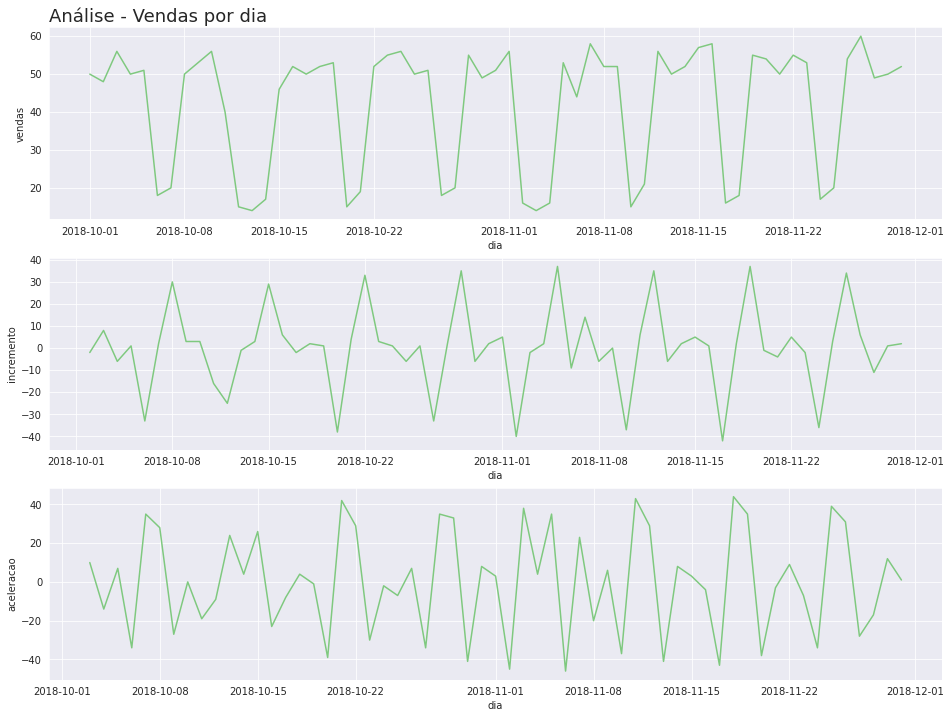

In [60]:
plot_comparacao(vendas_por_dia['dia'],vendas_por_dia['vendas'],vendas_por_dia['incremento'],vendas_por_dia['aceleracao'],"Análise - Vendas por dia", vendas_por_dia)

### Analisando a sazonalidade

In [61]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday

In [62]:
vendas_por_dia

,dia,vendas,incremento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,0
1,2018-10-02,48,-2.0,NaN,1
2,2018-10-03,56,8.0,10.0,2
3,2018-10-04,50,-6.0,-14.0,3
4,2018-10-05,51,1.0,7.0,4
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,0
57,2018-11-27,60,6.0,-28.0,1
58,2018-11-28,49,-11.0,-17.0,2
59,2018-11-29,50,1.0,12.0,3


In [63]:
vendas_por_dia['dia_da_semana'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [64]:
dias_traduzidos = {0 : 'Segunda',
                   1 : 'Terca',
                   2 : 'Quarta',
                   3 : 'Quinta',
                   4 : 'Sexta',
                   5 : 'Sabado',
                   6 : 'Domingo'}

In [65]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [66]:
vendas_por_dia

,dia,vendas,incremento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Segunda
57,2018-11-27,60,6.0,-28.0,Terca
58,2018-11-28,49,-11.0,-17.0,Quarta
59,2018-11-29,50,1.0,12.0,Quinta


### Agrupando os dias

In [67]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'incremento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [68]:
type(vendas_agrupadas)

pandas.core.frame.DataFrame

In [69]:
vendas_agrupadas

,vendas,incremento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


In [70]:
# análise: o final de semana tem uma queda.

### Correlação das vendas diárias

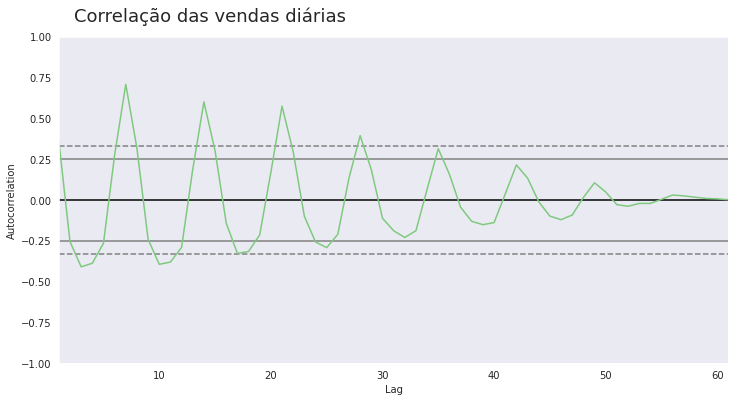

In [71]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas']);

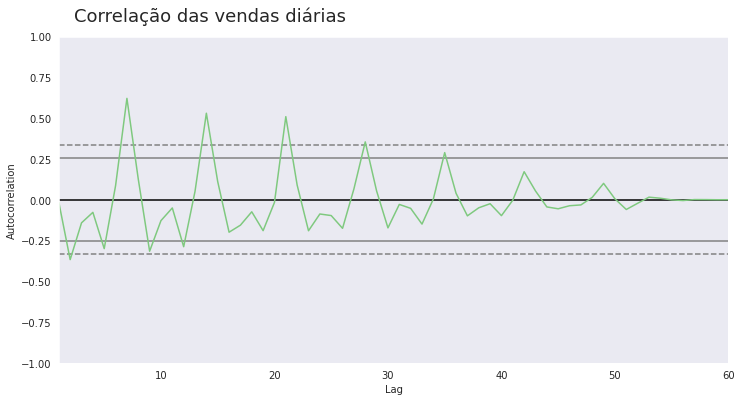

In [72]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['incremento'][1:]);

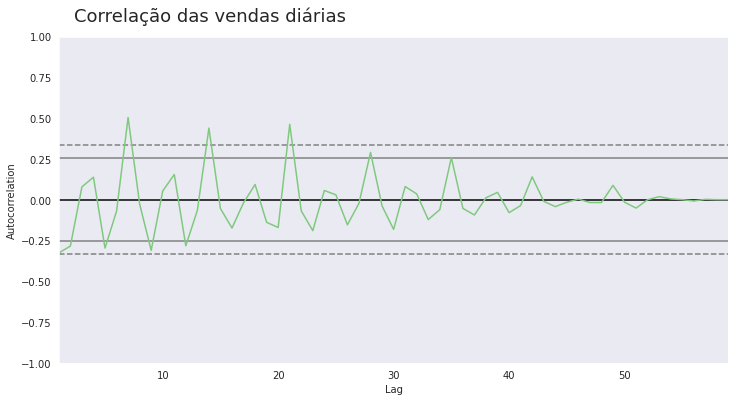

In [73]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:]);

# Cafelura - Análise de vendas

In [74]:
cafelura = pd.read_csv('/content/material curso - Time Series/cafelura.csv')

In [75]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [76]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [77]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [78]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [79]:
cafelura.shape

(24, 2)

In [80]:
cafelura.isna().sum().sum()

0

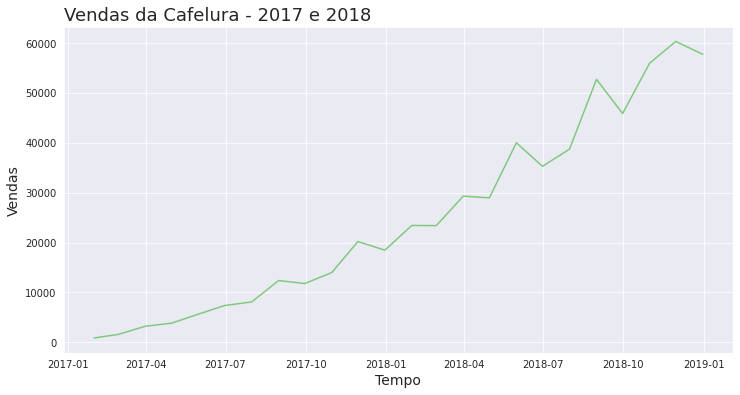

In [81]:
plotar('Vendas da Cafelura - 2017 e 2018','Tempo','Vendas','mes','vendas',cafelura)

In [82]:
qtde_dias_final_semana = pd.read_csv('/content/material curso - Time Series/dias_final_de_semana.csv')

In [83]:
qtde_dias_final_semana

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8
7,10
8,8
9,8


In [84]:
qtde_dias_final_semana['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [85]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/qtde_dias_final_semana['quantidade_de_dias'].values

In [86]:
cafelura

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0
5,2017-06-30,7380,820.0
6,2017-07-31,8096,1012.0
7,2017-08-31,12390,1239.0
8,2017-09-30,11792,1474.0
9,2017-10-31,13984,1748.0


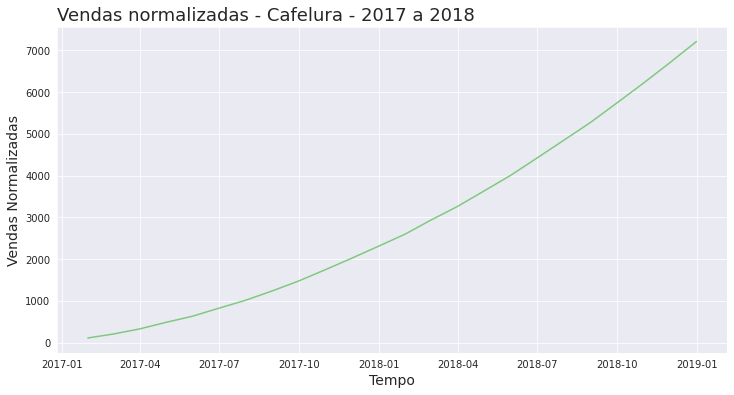

In [87]:
plotar('Vendas normalizadas - Cafelura - 2017 a 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

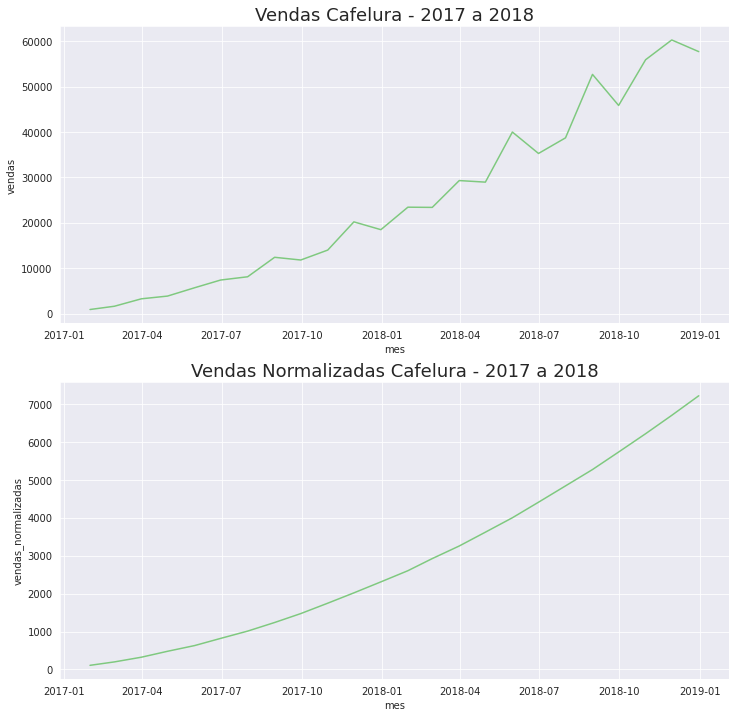

In [88]:
plt.figure(figsize=(12,12))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura - 2017 a 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura - 2017 a 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura);

# Statesmodels


In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose

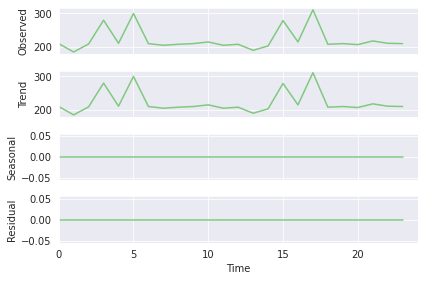

In [90]:
resultado = seasonal_decompose([chocolura['vendas']],freq=1)
ax=resultado.plot();

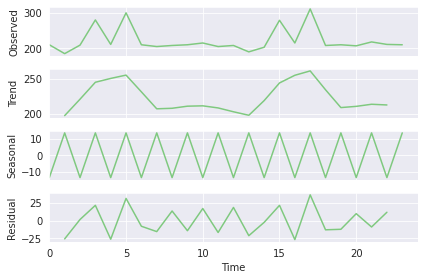

In [91]:
resultado = seasonal_decompose([chocolura['vendas']],freq=2)
ax=resultado.plot();

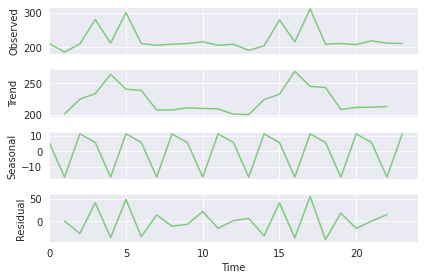

In [92]:
resultado = seasonal_decompose([chocolura['vendas']],freq=3)
ax=resultado.plot();

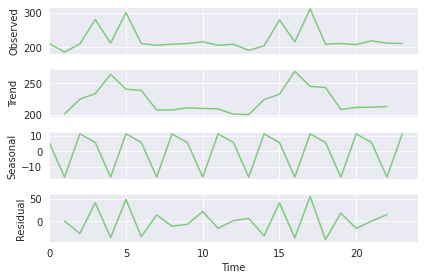

In [93]:
resultado = seasonal_decompose([chocolura['vendas']],freq=3)
ax=resultado.plot();

In [94]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [95]:
data = ({
    'observacao' : observacao,
    'tendencia' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruido' : ruido
})

resultado = pd.DataFrame(data)
resultado

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508
5,300,240.333333,11.126984,48.539683
6,210,238.333333,5.603175,-33.936508
7,205,207.666667,-16.730159,14.063492
8,208,207.666667,11.126984,-10.793651
9,210,211.000000,5.603175,-6.603175


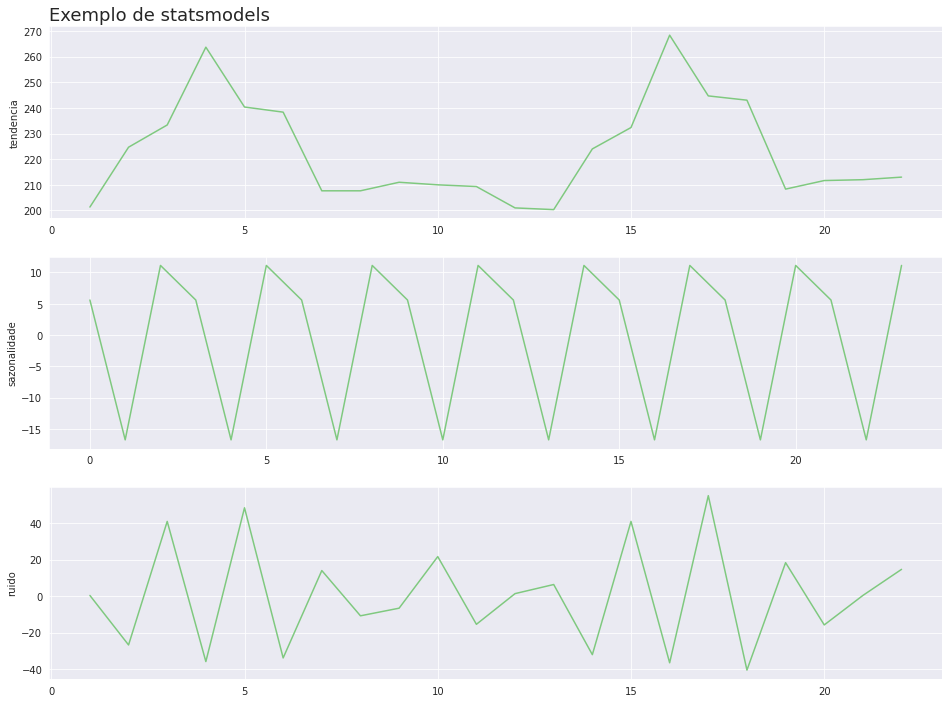

In [96]:
plot_comparacao(resultado.index, 'tendencia', 'sazonalidade', 'ruido', 'Exemplo de statsmodels', resultado)

# Alucel - Análise de vendas

In [97]:
url = '/content/material curso - Time Series/alucel.csv'

alucel = pd.read_csv(url)

In [98]:
alucel

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17
...,...,...
56,2018-11-26,10773.53
57,2018-11-27,22984.56
58,2018-11-28,9216.26
59,2018-11-29,12147.61


In [99]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [100]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [102]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [103]:
alucel.isna().sum().sum()

0

In [104]:
alucel.shape

(61, 2)

In [105]:
alucel['incremento'] = alucel['vendas'].diff()

In [106]:
alucel['aceleracao'] = alucel['incremento'].diff()

In [107]:
alucel

,dia,vendas,incremento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51
...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84
57,2018-11-27,22984.56,12211.03,13937.49
58,2018-11-28,9216.26,-13768.30,-25979.33
59,2018-11-29,12147.61,2931.35,16699.65


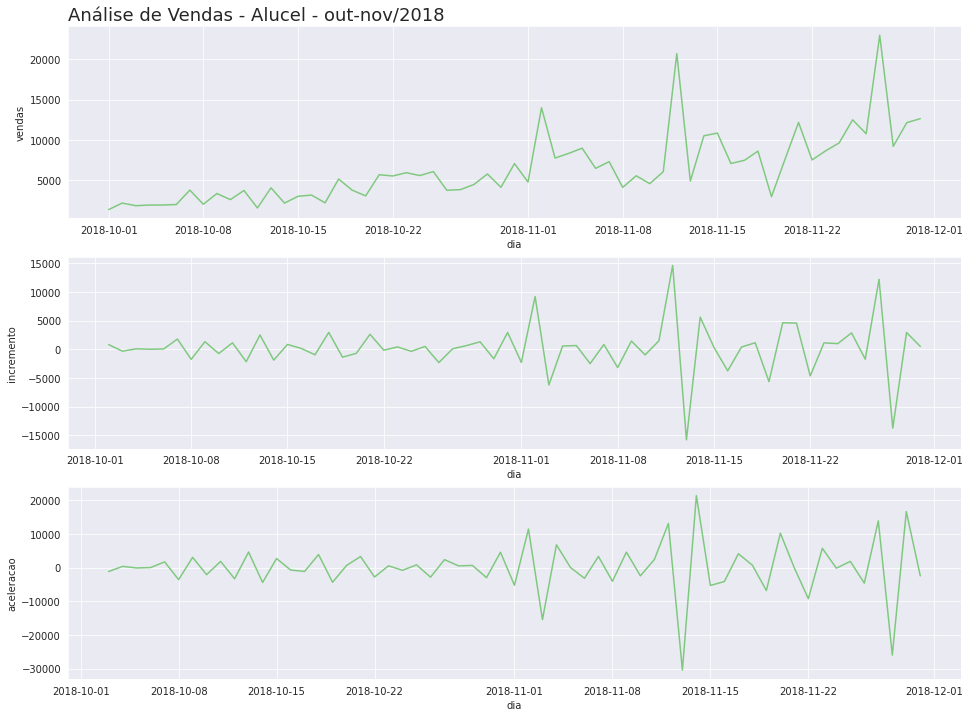

In [108]:
plot_comparacao('dia','vendas','incremento','aceleracao',"Análise de Vendas - Alucel - out-nov/2018", alucel)

## Média móvel

In [109]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean() # especificar quantos dias (linhas do dataset) e média

In [111]:
alucel.head(20)

,dia,vendas,incremento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


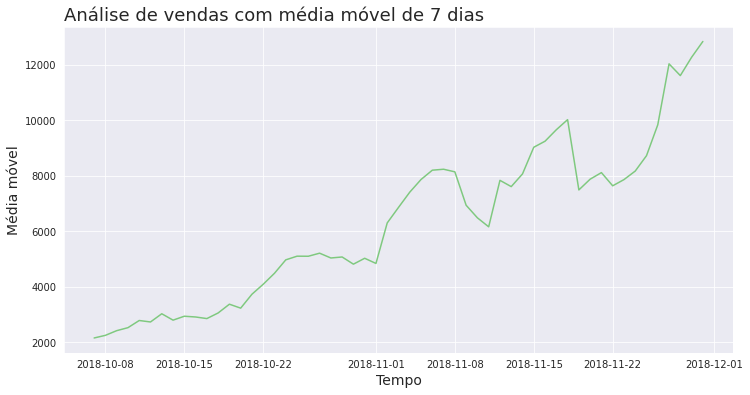

In [112]:
plotar("Análise de vendas com média móvel de 7 dias","Tempo","Média móvel","dia","media_movel",alucel)

In [113]:
alucel['media_movel21'] = alucel['vendas'].rolling(21).mean()

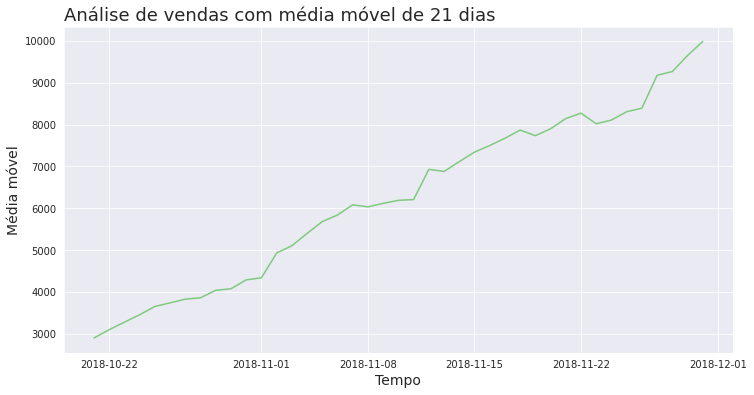

In [114]:
plotar("Análise de vendas com média móvel de 21 dias","Tempo","Média móvel","dia","media_movel21",alucel)

In [116]:
# isso reduz muito o ruído, mas se faço um "Rolling" muito grande, começo a perder informação também.
# mas tem que saber analisar: quanto é o ideal.

## Comparar abaixo... Veja a normalização que as médias móveis proporcionam

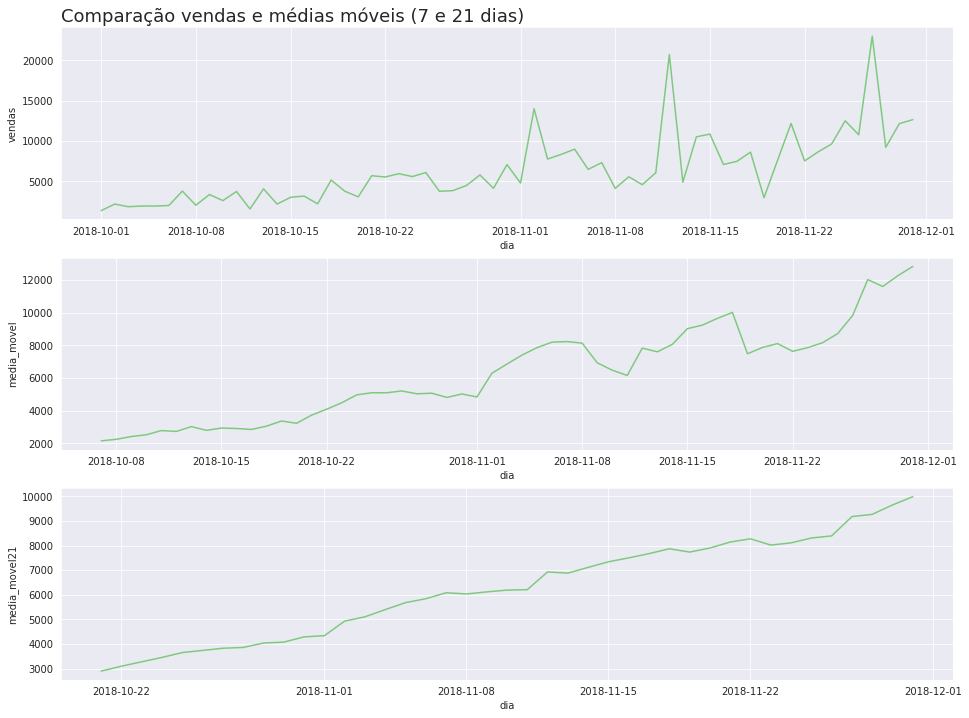

In [117]:
plot_comparacao('dia','vendas','media_movel','media_movel21',"Comparação vendas e médias móveis (7 e 21 dias)",alucel)